Data: [687 819 888 912 392 464 705 493 419 526]
Result: [392, 419, 464, 493, 526, 687, 705, 819, 888, 912]
Time: 0.11587142944335938ms


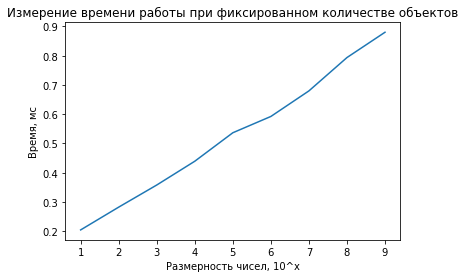

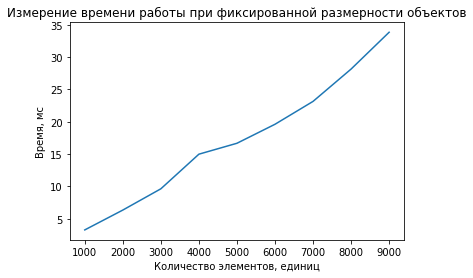

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time
from math import log
import random



def get_digit(n, k, digit_num):
    return (n // k ** digit_num) % k


def make_blanks(size):
    return [[] for i in range(size)]


def split(a_list, k, digit_num):
    buckets = make_blanks(k)
    for n in a_list:
        buckets[get_digit(n, k, digit_num)].append(n)

    return buckets


def merge(a_list):
    new_list = []
    for sublist in a_list:
        new_list.extend(sublist)

    return new_list


def max_abs(a_list):
    return max(abs(num) for num in a_list)


def split_by_sign(a_list):
    buckets = [[], []]
    for n in a_list:
        if n > 0:
            buckets[1].append(n)
        else:
            buckets[0].append(n)

    return buckets


def radix_sort(a_list, k=10):
    passes = int(round(log(max_abs(a_list), k)) + 1)
    new_list = list(a_list)
    for digit_num in range(passes):
        new_list = merge(split(new_list, k, digit_num))

    return merge(split_by_sign(new_list))


def gen_random_generator(length, top):
    return np.random.randint(top, size=length)


def measure(length, top):
    data = gen_random_generator(length, top)

    time_start = time.time()
    result = radix_sort(data)
    time_stop = time.time()

    return data, result, time_stop - time_start


def visualization():
    def time(count, dim):
        return np.mean([measure(count, 10 ** dim)[2] for i in range(10)])

    time_top = lambda dimension: time(int(10e1), dimension)
    top_x = np.arange(1, 10)
    top_y = [i * 1000 for i in map(time_top, top_x)]

    time_length = lambda count: time(count, 3)
    length_x = [int(i) for i in np.arange(10e2, 10e3, step=10e2)]
    length_y = [i * 1000 for i in map(time_length, length_x)]

    plt.plot(top_x, top_y)
    plt.xlabel('Размерность чисел, 10^x')
    plt.ylabel('Время, мс')
    plt.title('Измерение времени работы при фиксированном количестве объектов')
    plt.show()

    plt.plot(length_x, length_y)
    plt.xlabel('Количество элементов, единиц')
    plt.ylabel('Время, мс')
    plt.title('Измерение времени работы при фиксированной размерности объектов')
    plt.show()


if __name__ == '__main__':
    data, result, time_delta = measure(10, 1000)
    print('Data: {}\nResult: {}\nTime: {}ms'.format(data, result, time_delta * 1000))

    visualization()
